# Data exploration 
## Predict Loan Eligibility for Dream Housing Finance company

## Variables:

Loan_ID: Unique Loan ID

Gender: Male/ Female

Married	Applicant: (Y/N)

Dependents: Number of dependents

Education: Applicant Education (Graduate/ Under Graduate) 

Self_Employed: (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount: Loan amount in thousands

Loan_Amount_Term: Term of loan in months

Credit_History: credit history meets guidelines

Property_Area: Urban/ Semi Urban/ Rural

Loan_Status	(Target): (Y/N)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plots
import seaborn as sns #more plots
from scipy.stats import percentileofscore


import warnings  # Base category for warnings triggered during the process of importing a module (ignored by default)
warnings.filterwarnings('ignore')  # here we prescribe the action in case of an error.

data = pd.read_csv('../data/train.csv')



In [2]:
# Check data types and missing values
print("Dataset info:")
print(data.info())
print(' ')
print('Percentage of missing data by variable:')
print((data.isnull().sum()/len(data)) * 100)
print(' ')
print("Summary statistics:")
print(data.describe(include=object))
print(data.describe())
print(f'The target variable has distribution of {(data["Loan_Status"] == "Y").sum()/len(data):.2%} of loans appoved and {(data["Loan_Status"] == "N").sum()/len(data):.2%} of rejected')
#print(f'The target variable has distribution of {data[data['Loan_status']=='Y'].sum():.2%}')
data.head()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
 
Percentage of missing data by variable:
Loan_ID              0.000000
Gender               

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


From this first glance:
The vairables 'Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History' are binary categorical variables; The variable 'Dependets' could be integer but is categorical with low cardinality; The variable 'Property_Area' is categorial with low cardinality; The variables 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' and 'Loan_Amount_Term' are numerical; Finally the target, 'Loan_Status', is binary categorical.

The missing values are less than 10% for all variables, the worst is 'Credit_History' with a little bit more than 8% of missing values.

The distribution of the taget values is biased to the appoved but seem coherent.

Due to 'Credit_History' is a binary categorical variable with the interpretation of 1 for 'yes' and 0 for 'no'. We change their values for 'Y' and 'N'


In [3]:
data['Credit_History'].replace({1: 'Y', 0: 'N'}, inplace=True)

## Analisys of each variable

Let's analyse the distribution, outliers and missing values of each variable.

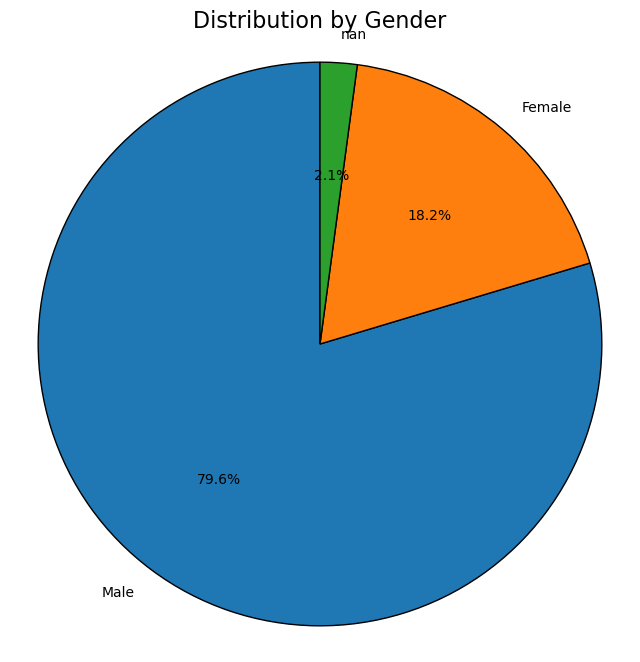

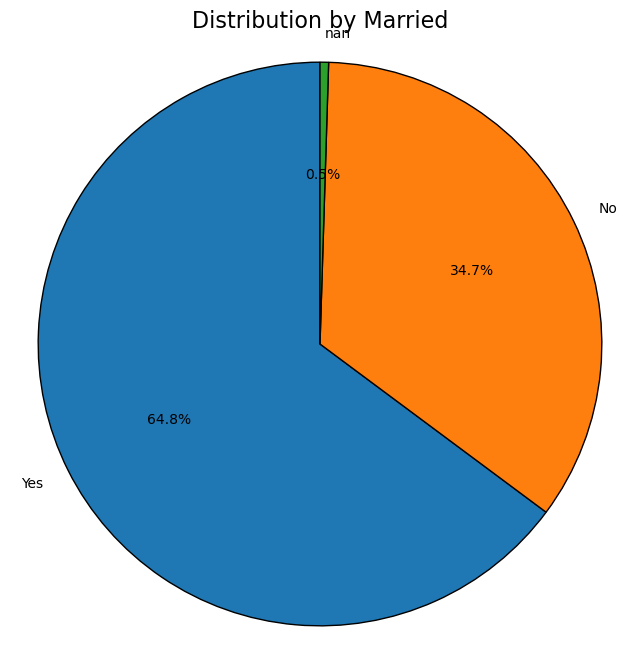

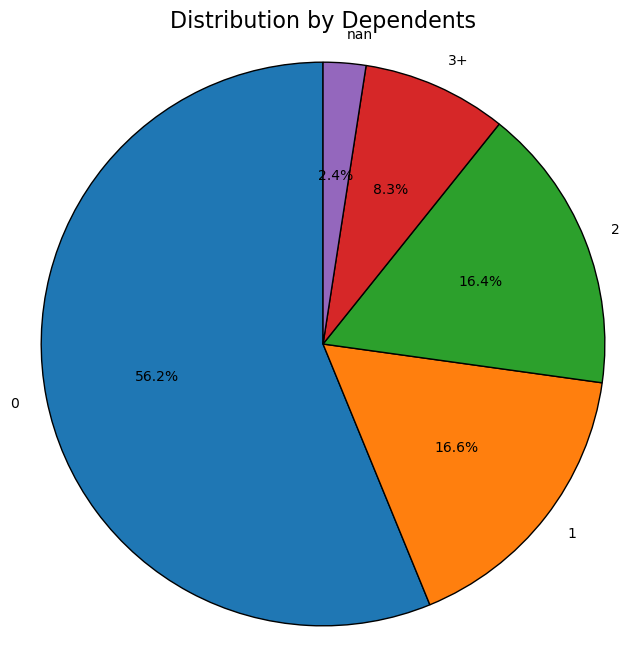

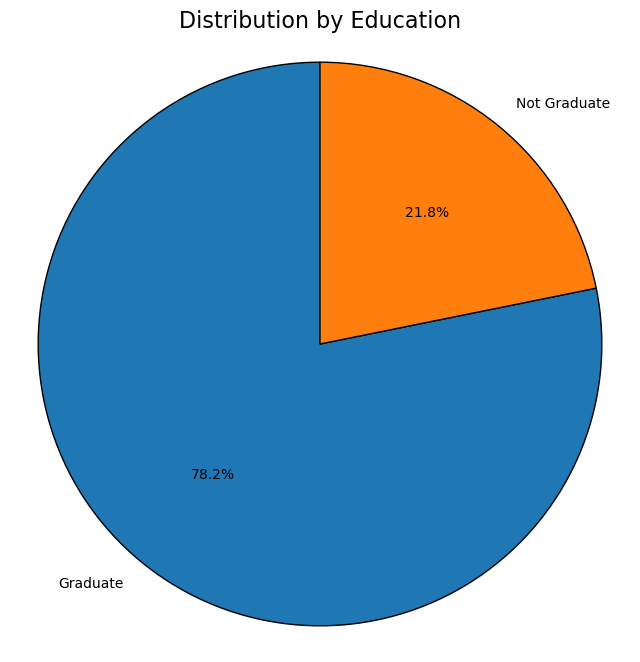

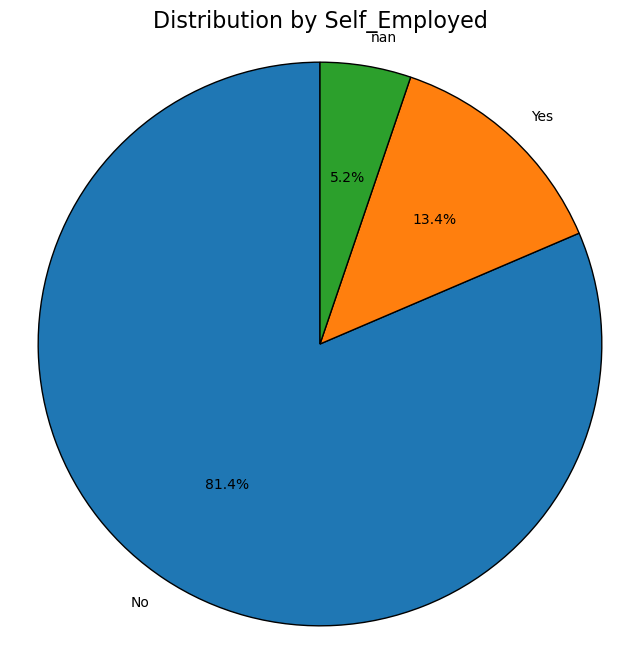

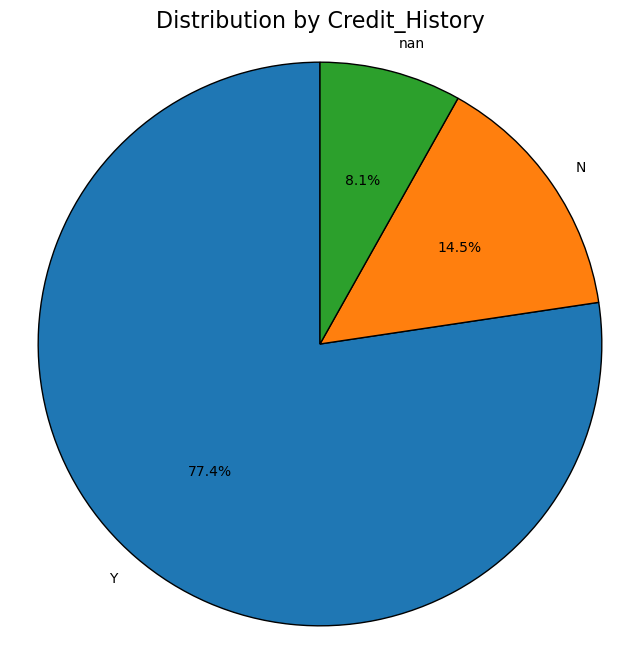

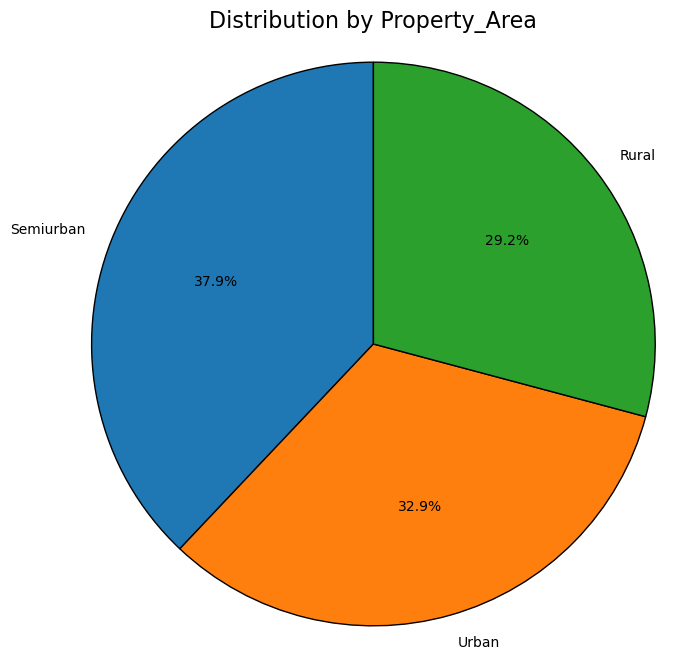

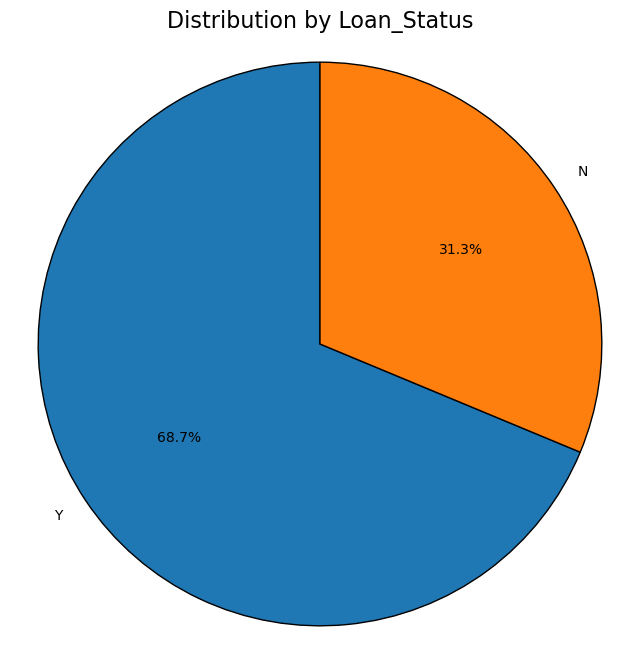

In [4]:
Categorical=data.select_dtypes(include=['object']).columns


def grafica(var):
    count_cat = data[var].value_counts(dropna=False)

    label = count_cat.index
    values = count_cat.values

    plt.figure(figsize=(8, 8)) # Ajusta el tamaño para que se vea bien

    plt.pie(
            values, 
            labels=label,
            autopct='%1.1f%%',       
            startangle=90,           
            wedgeprops={'edgecolor': 'black'} 
            )

    plt.axis('equal') 
    plt.title(f'Distribution by {var}', fontsize=16)
    plt.show()

for cat in Categorical.drop('Loan_ID'):
    grafica(cat)

The amount of missing values of 'Credit_History' could be relevant because it seems to be a very sensitive variable.

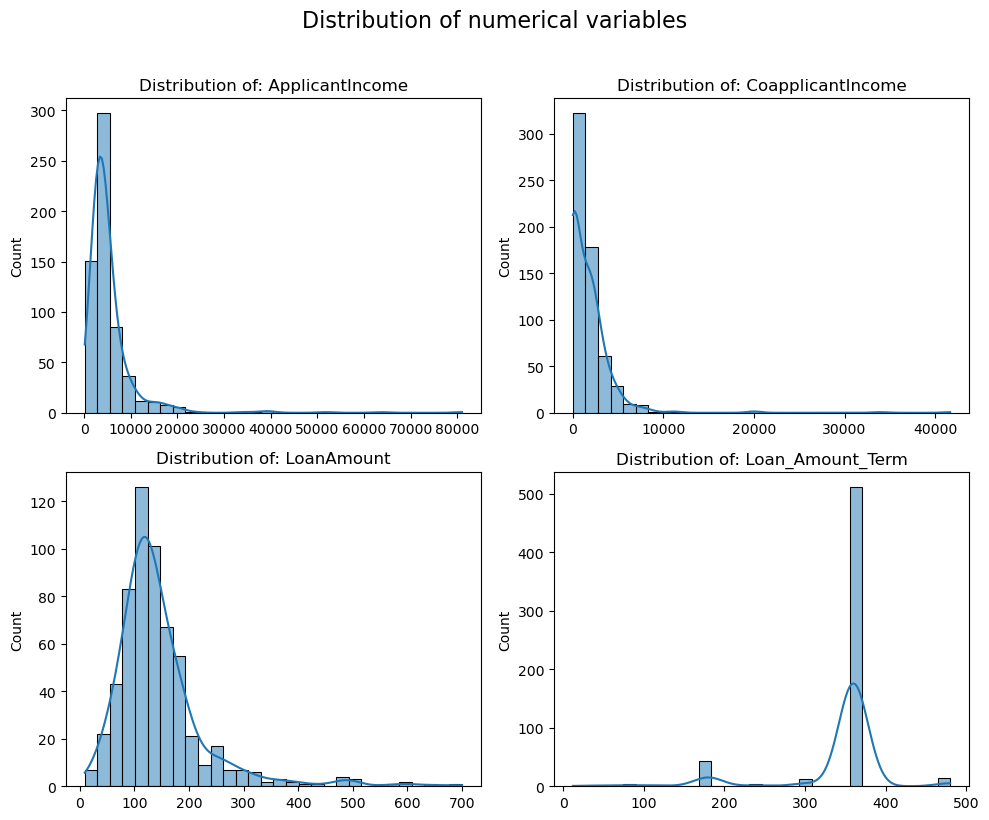

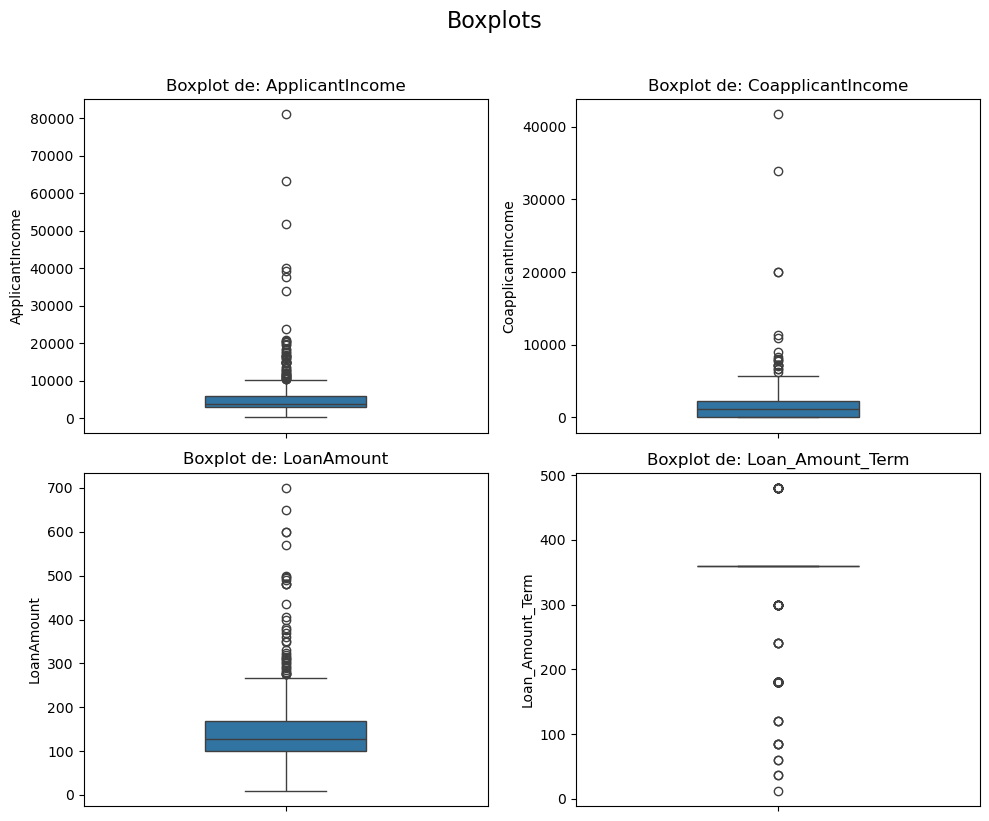

In [5]:
Numerical=data.select_dtypes(include=['number']).columns



n_cols = 2 
n_rows = (len(Numerical) + n_cols - 1) // n_cols 

# CReate subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() 


for i, col in enumerate(Numerical):
    if i < len(axes): 
        sns.histplot(
            data=data, 
            x=col, 
            ax=axes[i], 
            bins=30,  
            kde=True, 
            edgecolor="black", 
            line_kws={'linewidth': 1.5} 
        )
        axes[i].set_title(f'Distribution of: {col}', fontsize=12)
        axes[i].set_xlabel('') 


for j in range(len(Numerical), len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("Distribution of numerical variables", fontsize=16, y=1.02)
plt.tight_layout() 
plt.show()

# CReate subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() 


for i, col in enumerate(Numerical):    
    if i < len(axes):
        sns.boxplot(
        y=data[col],  # Pasamos la columna como univariada (solo eje Y)
        ax=axes[i], # Indicamos en qué subplot dibujar
        color='#1f77b4', # Color sólido (puedes usar un color fijo o una paleta)
        width=0.4      # Ancho del boxplot para mejor visualización
    )
    
    # Ajustes del título y etiquetas
    axes[i].set_title(f'Boxplot de: {col}', fontsize=12)
    axes[i].set_xlabel('') # Limpiamos la etiqueta X
    axes[i].set_ylabel(col, fontsize=10) # Usamos el nombre de la variable como etiqueta Y

# 5. Ocultar los ejes va

for j in range(len(Numerical), len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("Boxplots", fontsize=16, y=1.02)
plt.tight_layout() 
plt.show()




The distributions of 'Applicantincome' and 'Coapplicantincome' are similar hevy biased to lower values and a long tail.

The distribution of 'LoanAmount' is similar, slightly biased to lower values and a long tail.

The first three variables have large  number of outliers. In the case of 'Loan_Amount_Term', the mode is so pronounced that it requires a particular approach.

In [6]:
for var in Numerical:
    Q1=data[var].quantile(0.25)
    Q3=data[var].quantile(0.75)
    IQR = Q3-Q1
    out=data[var].where(data[var]>Q3+1.5*IQR).dropna()
    print(len(out),'outliers for', var)
    print(out)


50 outliers for ApplicantIncome
9      12841.0
34     12500.0
54     11500.0
67     10750.0
102    13650.0
106    11417.0
115    14583.0
119    10408.0
126    23803.0
128    10513.0
130    20166.0
138    14999.0
144    11757.0
146    14866.0
155    39999.0
171    51763.0
183    33846.0
185    39147.0
191    12000.0
199    11000.0
254    16250.0
258    14683.0
271    11146.0
278    14583.0
284    20667.0
308    20233.0
324    15000.0
333    63337.0
369    19730.0
370    15759.0
409    81000.0
424    14880.0
432    12876.0
438    10416.0
443    37719.0
467    16692.0
475    16525.0
478    16667.0
483    10833.0
487    18333.0
493    17263.0
506    20833.0
509    13262.0
525    17500.0
533    11250.0
534    18165.0
561    19484.0
572    16666.0
594    16120.0
604    12000.0
Name: ApplicantIncome, dtype: float64
18 outliers for CoapplicantIncome
9      10968.0
12      8106.0
38      7210.0
122     8980.0
135     7750.0
177    11300.0
180     7250.0
253     7101.0
349     6250.0
372     787

The 'Loan_Amount_Term' has a pronounced mode of 360 (3 years). However, they appear to be evenly spaced at 60 days, but this is not entirely correct or there are errors. It seems almost a categorical variable by their cardinality, but we keep it as numerical because of their meaning.

In [7]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

We can see that 12 could be the term in months instead of days or a typo. 
The 36 values could be a typo for 360.
The value 84 has no explanation and is discarded.

In [8]:
print(data[data['Loan_Amount_Term']==12])
print(data[data['Loan_Amount_Term']==36])
print("Statistics for loan witn 'Loan_Amount_Term' 120")
print(data[data['Loan_Amount_Term']==120].describe())
print("Statistics for loan witn 'Loan_Amount_Term' 360")
print(data[data['Loan_Amount_Term']==360].describe())

      Loan_ID Gender Married Dependents Education Self_Employed  \
497  LP002588   Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
497             4625             2857.0       111.0              12.0   

    Credit_History Property_Area Loan_Status  
497            NaN         Urban           Y  
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
262  LP001870  Female      No          1      Graduate            No   
546  LP002768    Male      No          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
262             3481                0.0       155.0              36.0   
546             3358                0.0        80.0              36.0   

    Credit_History Property_Area Loan_Status  
262              Y     Semiurban           N  
546              Y     Semiurban           N  
Statistics for loan witn 'Loan_Amount_Term' 12

A Loan Amount of 111 would be an outlier among the data for Loan Amount Term 120 and a common value in the data of Loan Amount Term 360. Therefore, we consider this value as a mistake of time expressed in months instead of days.

Similarly, for the data with Loan Amount Term 36, they have common values in the data of Loan Amount Term 360. Therefore, we consider this a typo and fixed it by putting Loan Amount Term 360.

# Relationship between variables

Let us analyse relationship between categorical variables, including 'Loan_status'

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


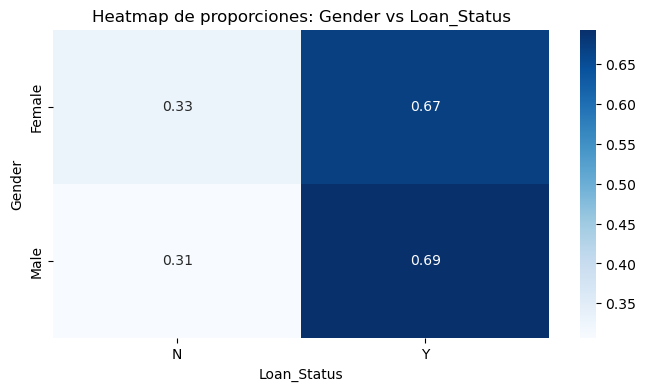

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


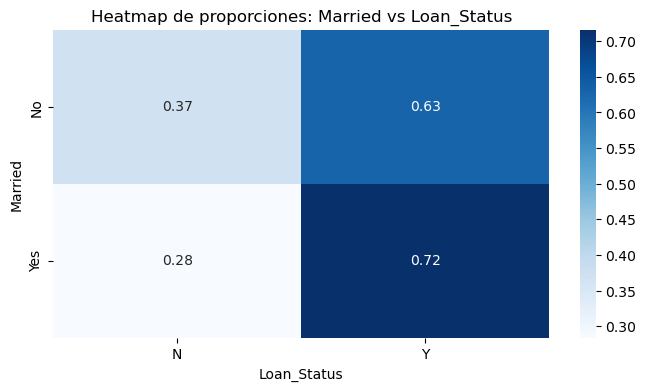

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


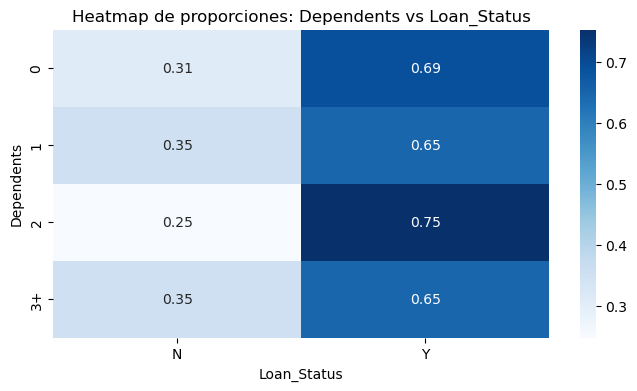

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


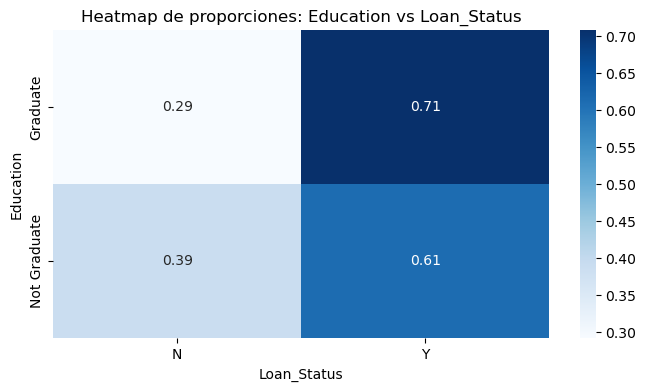

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


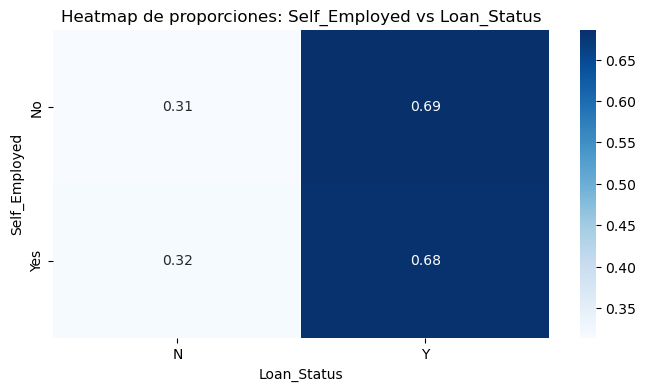

Loan_Status      N    Y
Credit_History         
N               82    7
Y               97  378


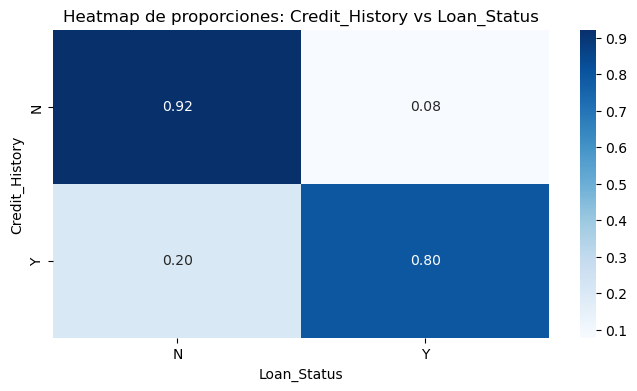

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


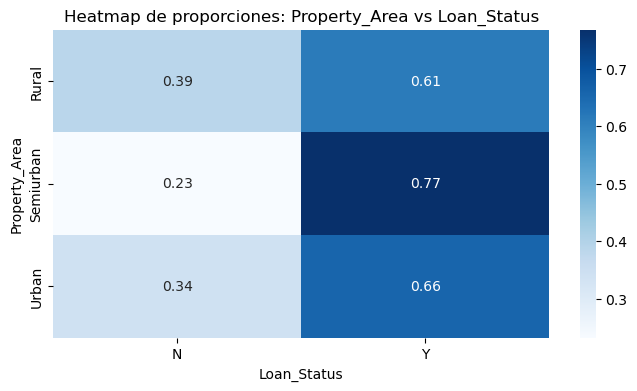

In [9]:
var = "Credit_History"
target = "Loan_Status"

for var in Categorical.drop(['Loan_ID','Loan_Status']):
    tabla = pd.crosstab(data[var], data[target])
    print(tabla)
    
    crosstab = pd.crosstab(data[var], data[target], normalize="index")
    plt.figure(figsize=(8,4))
    sns.heatmap(crosstab, annot=True, cmap="Blues", fmt=".2f")
    plt.title(f'Heatmap de proporciones: {var} vs {target}')
    plt.show()


Taking into account that target variable has distribution of 68.73% of loans appoved and 31.27% of rejected. 'Gender', 'Marriage', 'Dependents' and 'Self_Employed' do not seems to be relevant at first glace; 'Education' and 'Property_Area' has a slithly relevance; and 'Credit_History' is very significative. 

Let's analyse different familiar compositions:

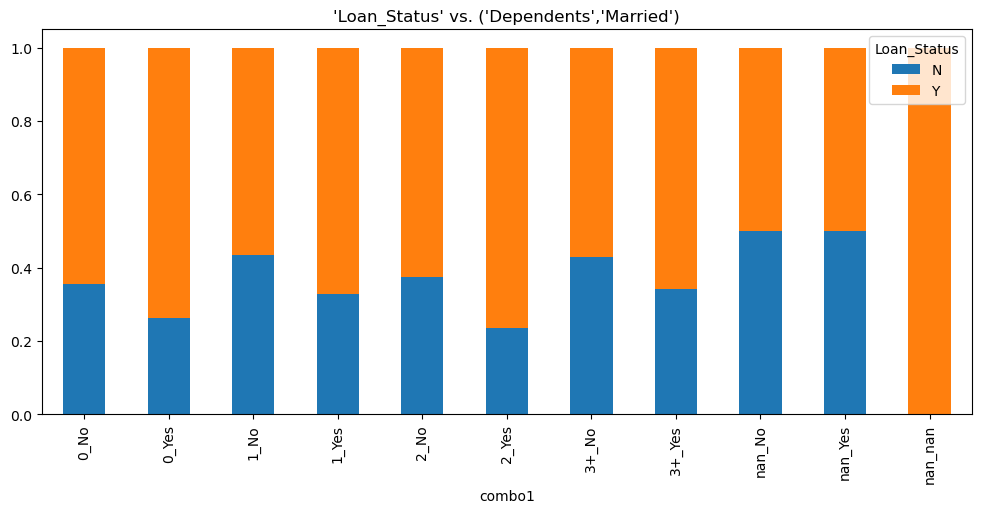

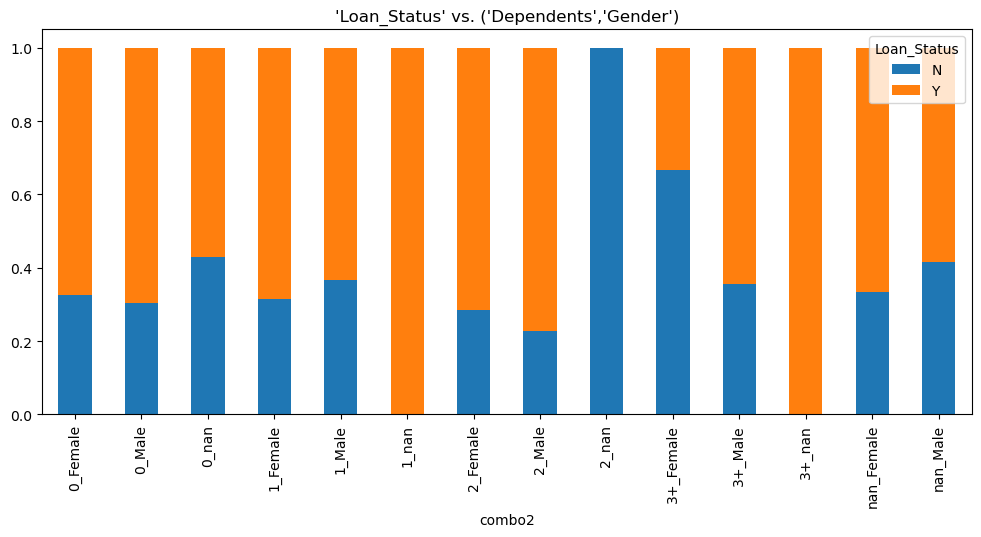

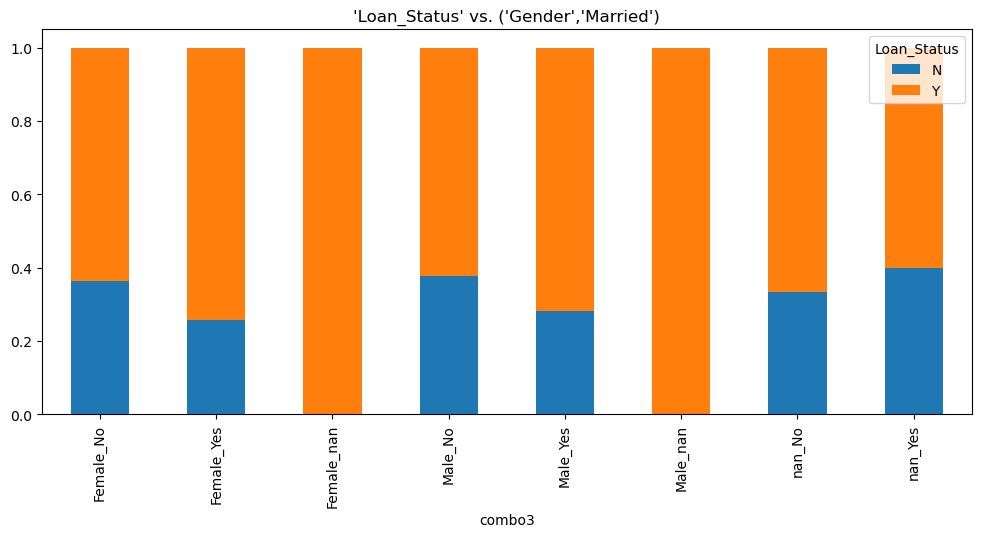

In [10]:
data["combo1"] = data["Dependents"].astype(str) + "_" + data["Married"].astype(str) 

pd.crosstab(data["combo1"],data["Loan_Status"], normalize='index')

crosstab = pd.crosstab(data["combo1"],data["Loan_Status"], normalize="index")

crosstab.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("'Loan_Status' vs. ('Dependents','Married')")
plt.xticks(rotation=90)
plt.show()

data["combo2"] = data["Dependents"].astype(str) + "_" + data["Gender"].astype(str) 

pd.crosstab(data["combo2"], data["Loan_Status"], normalize='index')

crosstab = pd.crosstab(data["combo2"], data["Loan_Status"], normalize="index")

crosstab.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("'Loan_Status' vs. ('Dependents','Gender')")
plt.xticks(rotation=90)
plt.show()

data["combo3"] = data["Gender"].astype(str) + "_" + data["Married"].astype(str) 

pd.crosstab(data["combo3"], data["Loan_Status"], normalize='index')

crosstab = pd.crosstab(data["combo3"], data["Loan_Status"], normalize="index")

crosstab.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("'Loan_Status' vs. ('Gender','Married')")
plt.xticks(rotation=90)
plt.show()



The combinations that's includes 'Married' seems to be a little more significative.

Let us analyse relationship between numerical variables and 'Loan_status'

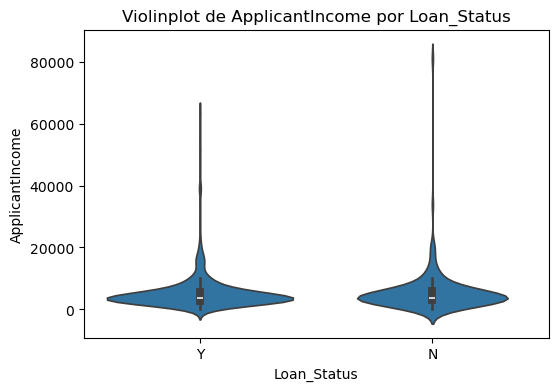

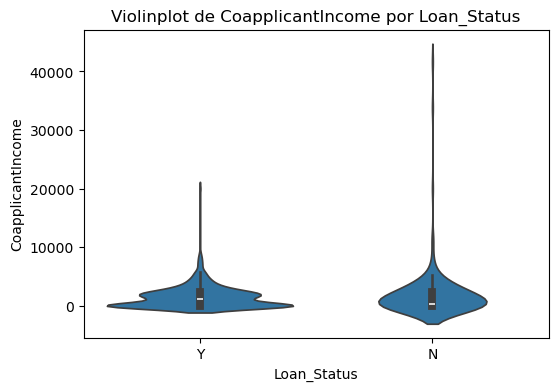

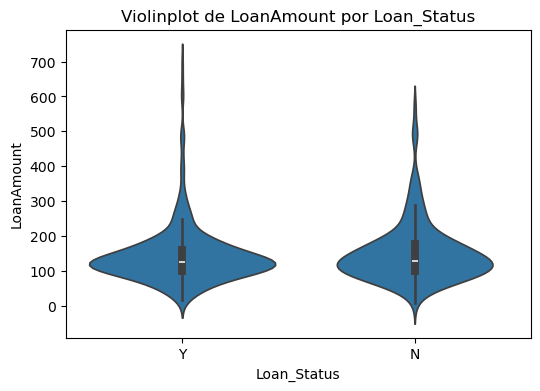

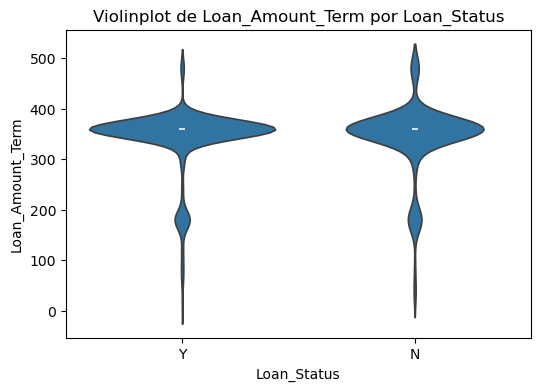

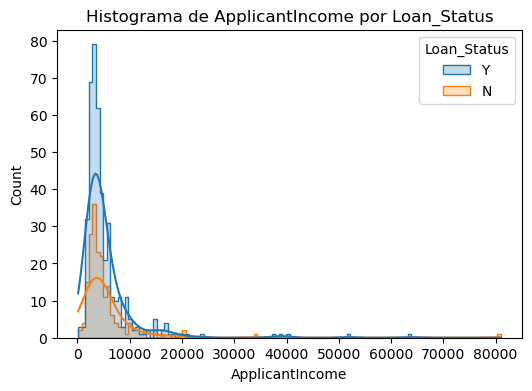

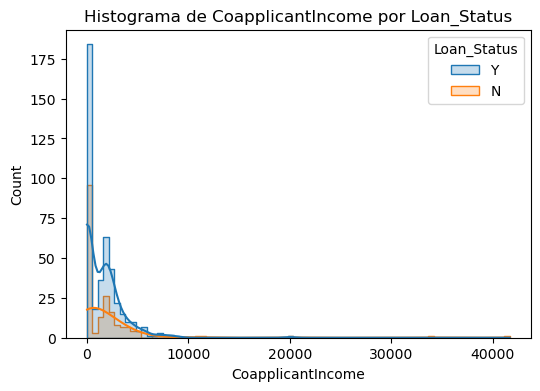

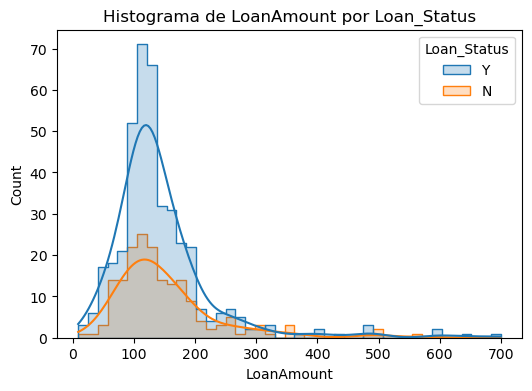

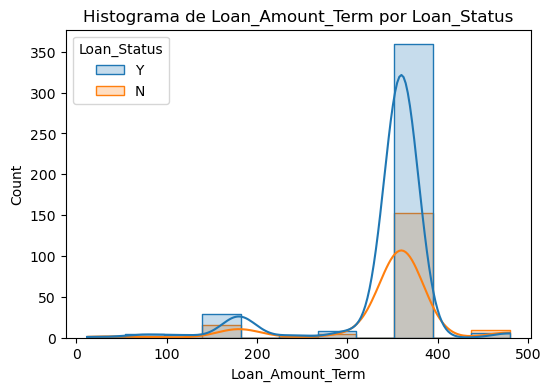

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in Numerical:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Loan_Status', y=col, data=data)
    plt.title(f'Violinplot de {col} por Loan_Status')
    plt.show()

for col in Numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, hue='Loan_Status', kde=True, element='step')
    plt.title(f'Histograma de {col} por Loan_Status')
    plt.show()



The distribution of the population for each 'Loan_Status' seems similar in the continuous variables.

It is clear that 'Applicantincome' and 'Coapplicantincome' are closely related with capability of pay, therefore we consider the sum of this variables vs 'LoanAmount'


## Missing values and outliers

Remember that:

In [12]:
print('Missing data by variable:')
print(data.isnull().sum())
print('Percentage of missing data by variable:')
print((data.isnull().sum()/len(data)) * 100)

Missing data by variable:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
combo1                0
combo2                0
combo3                0
dtype: int64
Percentage of missing data by variable:
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
combo1               0.000000
combo2               0.000000
combo3               0.000000
dtype: float64


The variables 'LoanAmount' and 'Loan_Amount_Term' are very important for the acceptance of a loan and will not be null in the information of an applicant. For this reason, we discard the entries with missing values in such variables.

In [13]:
Loancols = [ 'LoanAmount',  'Loan_Amount_Term']
data_aux=data.dropna(subset=Loancols)
print(data.shape)
print(data_aux.shape)

(614, 16)
(578, 16)


It is important to note that by dropping these entries, we discard around 6% of the information; however, these variables are crucial.

Taking into account that the distribution of 'Loan_Status' is similar in each category of the variables 'Gender', 'Married', 'Dependents', and 'Self_Employed' are similar, it seems that they would be of no relevance for the featuring engineering. In case these variables are considered, these entries could be discarded. The warning about that is the risk of discarding too much information, and it'is the case:

In [14]:
dropcols = [ 'LoanAmount',  'Loan_Amount_Term','Gender', 'Married', 'Dependents', 'Self_Employed']

data_dropcols = data.dropna(subset=dropcols)

print(data.shape)
print(data_dropcols.shape)

(614, 16)
(523, 16)


Dropping this rows we lost a 10% more of information. Therefore the missing information on these variables should be imputed.

Finally, the missing values in 'Credit_History' are imputed with a label pointing out this missing information.

In [15]:
data['Credit_History'] = data['Credit_History'].fillna('DK')

For the outliers in the continuous variable, we decide to keep them. The reason is that the analysis for considering outliers in some of these variables should be done considering the values of all (or almost all) of them. For example, the outliers for 'LoanAmount' are 39, but the amount of a loan is excessive relative to the capacity of payment of applicant, or the applicant's and coapplicant's. If we consider it in this way, we obtain a very small number of outliers.

In [16]:
data["combonum"] = data["LoanAmount"]/(data["ApplicantIncome"]+data["CoapplicantIncome"])
var="combonum"
Q1=data[var].quantile(0.25)
Q3=data[var].quantile(0.75)
IQR = Q3-Q1
out=data[var].where(data[var]>Q3+1.5*IQR).dropna()
print(len(out),'outliers for', var)
print(out)


11 outliers for combonum
82     0.051243
153    0.049540
216    0.069231
225    0.052308
236    0.044379
255    0.082712
262    0.044527
354    0.044399
416    0.061538
449    0.044073
541    0.046305
Name: combonum, dtype: float64


## Information for continuing the work

For the data cleaning

In [18]:
data['Credit_History'].replace({1: 'Y', 0: 'N'}, inplace=True)
data['Credit_History'] = data['Credit_History'].fillna('DK')
data['Married'] = data['Married'].fillna('DK')
data['Gender'] = data['Gender'].fillna('DK')
data['Self_Employed'] = data['Self_Employed'].fillna('DK')
data = data[~(data['Loan_Amount_Term'] == 84)].copy()
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].replace({12: 360, 36:360}) 
Loancols = [ 'LoanAmount',  'Loan_Amount_Term']
data.dropna(subset=Loancols, inplace=True)

The missing values in the variable 'Dependences' could be imputed with a 'DK' or in a more sophisticated way. This decision will be taken in the featuring engeneering.